In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_load = "data/city_data.csv"
ride_load = "data/ride_data.csv"
city_load_read = pd.read_csv(city_load)
ride_load_read = pd.read_csv(ride_load)


# Display the data table for preview
city_load_read.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_load_read.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [27]:
# Combine the data into a single data set
merge_city_ride_data = pd.merge(ride_load_read, city_load_read, on="city")
merge_city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
city_groupby = merge_city_ride_data.groupby('city')
city_groupby_ride_count = city_groupby['city'].count()

In [5]:
city_groupby_fare_total = city_groupby['fare'].sum()

In [6]:
average_city_fare = round(city_groupby_fare_total / city_groupby_ride_count, 2)

In [28]:
city_drop_duplicates = merge_city_ride_data.drop_duplicates('city').groupby('type')
average_fare_df = pd.DataFrame({
    'city groupby ride count': city_groupby_ride_count,
    'city groupby fare total': city_groupby_fare_total,
    'average city fare': average_city_fare
    #'driver count':
})
average_fare_df.head()

,city groupby ride count,city groupby fare total,average city fare
city,,,
Amandaburgh,18,443.55,24.64
Barajasview,22,557.31,25.33
Barronchester,16,582.76,36.42
Bethanyland,18,593.21,32.96
Bradshawfurt,10,400.64,40.06


## Bubble Plot of Ride Sharing Data

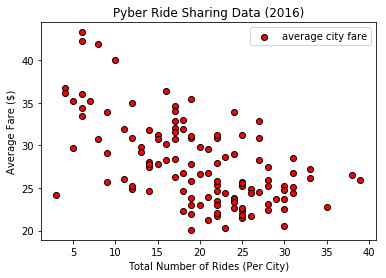

In [19]:
# Obtain the x and y coordinates for each of the three city types
x_axis = average_fare_df['city groupby ride count']
y_axis = average_fare_df['average city fare']

#plt.scatter(x_axis, y_axis, marker="o", facecolor="red", edgecolor="black")

# Build the scatter plots for each city types

urban_cities = merge_city_ride_data.loc[merge_city_ride_data['type'] == 'Urban'].groupby('city')
suburban_cities = merge_city_ride_data.loc[merge_city_ride_data['type'] == 'Suburban'].groupby('city')
rural_cities = merge_city_ride_data.loc[merge_city_ride_data['type'] == 'Rural'].groupby('city')

# urban_x_axis = 
# urban_y_axis = city_groupby_ride_count
# urban_s = 

# suburban_x_axis = average_city_fare
# suburban_y_axis = city_groupby_ride_count
# suburban_s = 

# rural X_axis = average_city_fare
# rural_y_axis = city_groupby_ride_count
# rural_s = 

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", facecolor="red", edgecolor="black")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(loc="upper right")

# Save Figure


In [9]:
# Show plot
plt.show()

## Total Fares by City Type

In [10]:
urban_cities = merge_city_ride_data.loc[merge_city_ride_data['type'] == 'Urban']
suburban_cities = merge_city_ride_data.loc[merge_city_ride_data['type'] == 'Suburban']
rural_cities = merge_city_ride_data.loc[merge_city_ride_data['type'] == 'Rural']

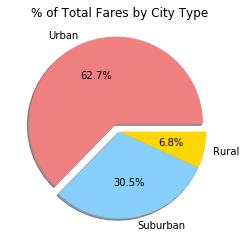

In [11]:
# Calculate Type Percents
total_fare_by_type = merge_city_ride_data['fare'].sum()

urban_fare_total = round(urban_cities.sum()['fare'], 2)
suburban_fare_total = round(suburban_cities.sum()['fare'], 2)
rural_fare_total = round(rural_cities.sum()['fare'], 2)

urban_fare_percentage = round(urban_fare_total / total_fare_by_type * 100, 1)
suburban_fare_percentage = round(suburban_fare_total / total_fare_by_type * 100 , 1)
rural_fare_percentage = round(rural_fare_total / total_fare_by_type * 100, 1)

# Build Pie Chart
labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_fare_percentage, suburban_fare_percentage, rural_fare_percentage]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("./Images/Total_Fares_Pie.png")


In [12]:
# Show Figure
plt.show()

## Total Rides by City Type

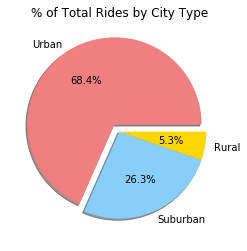

In [13]:
# Calculate Ride Percents
total_ride_count = merge_city_ride_data['ride_id'].count()
total_ride_count

urban_city_count = urban_cities.count()['ride_id']
suburban_city_count = suburban_cities.count()['ride_id']
rural_city_count = rural_cities.count()['ride_id']

urban_city_percentage = round(urban_city_count / total_ride_count * 100, 1)
suburban_city_percentage = round(suburban_city_count / total_ride_count * 100, 1)
rural_city_percentage = round(rural_city_count / total_ride_count * 100, 1)

# Build Pie Chart
labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_city_percentage, suburban_city_percentage, rural_city_percentage]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("./Images/Total_Rides_Pie.png")


In [14]:
# Show Figure
plt.show()

## Total Drivers by City Type

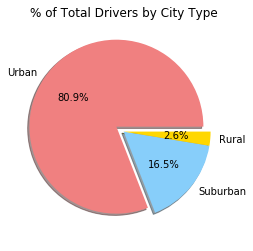

In [15]:
# Calculate Driver Percents
city_drop_duplicates = merge_city_ride_data.drop_duplicates('city').groupby('type')
type_driver_count = city_drop_duplicates['driver_count'].sum()
total_driver_count = type_driver_count['Urban'] + type_driver_count['Suburban'] + type_driver_count['Rural']

urban_driver_percentage = round(type_driver_count['Urban'] / total_driver_count * 100, 1)
suburban_driver_percentage = round(type_driver_count['Suburban'] / total_driver_count * 100, 1)
rural_driver_percentage = round(type_driver_count['Rural'] / total_driver_count * 100, 1)

# Build Pie Charts
labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_driver_percentage, suburban_driver_percentage, rural_driver_percentage]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("./Images/Total_Drivers_Pie.png")


In [16]:
# Show Figure
plt.show()